# Skopje Air Pollution

## Introduction

The city of Skopje is well known for its struggles with poor air quality, especially in the winter months. The main pollutants are CO, NO2, ozone, and particulate matter of different dimensions.

Monitoring stations for measuring the concentrations of each of the main pollutants have been installed in different locations around the city.

## Import Libraries
Before we begin, let us import the libraries that we will be using (Pandas, matplotlib and seaborn). Any additional libraries that we decide to import we will add in this cell.

In [2]:
# import libraries
import pandas as pd

## The Dataset
The following data has been taken from kaggle (https://www.kaggle.com/datasets/cokastefan/pm10-pollution-data-in-skopje-from-2008-to-2018) where data from the monitoring stations (https://air.moepp.gov.mk/?page_id=175) for the period from Janaury 2007 to December 2018 has been compiled in a single dataset. To make our task more managable, we will only be looking at data for the time period of five years, from January 2012 to December 2016.

## Import data
The data is contained in the directory CSVs in the files (CO.csv, NO2.csv, O3.csv, PM10.csv, and PM25.csv). Let's import the data from the CSV files as separate pandas dataframes.

In [3]:
# Read files into dataframes
import pandas as pd

# read CO.csv file and store it in a pandas dataframe
co_df = pd.read_csv('CO.csv')

# read NO2.csv file and store it in a pandas dataframe
no2_df = pd.read_csv('NO2.csv')

# read O3.csv file and store it in a pandas dataframe
o3_df = pd.read_csv('O3.csv')

# read PM10.csv file and store it in a pandas dataframe
pm10_df = pd.read_csv('PM10.csv')

# read PM25.csv file and store it in a pandas dataframe
pm25_df = pd.read_csv('PM25.csv')


## Review Data
Let's display each of the dataframes and look at the data types in order to get a sense of the data. Check that the data types are accurate.

In [4]:
# Display dataframes and check data types

# display first few rows of CO data frame
print("CO dataframe:")
print(co_df.head())
print(co_df.info())

print(___)
# display first few rows of NO2 data frame
print("NO2 dataframe:")
print(no2_df.head())
print(no2_df.info())

print(___)
# display first few rows of O3 data frame
print("O3 dataframe:")
print(o3_df.head())
print(o3_df.info())

print(___)
# display first few rows of PM10 data frame
print("PM10 dataframe:")
print(pm10_df.head())
print(pm10_df.info())

print(___)
# display first few rows of PM25 data frame
print("PM25 dataframe:")
print(pm25_df.head())
print(pm25_df.info())


CO dataframe:
   Unnamed: 0.1  Unnamed: 0  Centar  GaziBaba  Karpos  Lisice  Miladinovci  \
0         36212       36212  0.2876    0.9219  0.5644     NaN          NaN   
1         36213       36213  0.1538    1.2029  0.8275     NaN       0.3858   
2         36214       36214  0.1600    1.3198  0.7423     NaN       0.3346   
3         36215       36215  0.1699    1.1449  0.4445     NaN       0.3549   
4         36216       36216  0.1539    0.8092  0.5121     NaN       0.2553   

   Mobile  Rektorat                 time  
0     NaN    0.3708  2012-01-01 00:00:00  
1     NaN    0.4097  2012-01-01 01:00:00  
2     NaN    0.4061  2012-01-01 02:00:00  
3     NaN    0.6500  2012-01-01 03:00:00  
4     NaN    0.7198  2012-01-01 04:00:00  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45307 entries, 0 to 45306
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  45307 non-null  int64  
 1   Unnamed: 0    45

## Data cleaning and restructuring
Because the mobile column is from a mobile monitoring station located in the municipality of Butel and occasionally displaced, we can drop that column.

We can also rename the column time to datetime and create additional separate time and date columns. 

We can add a column in each of the dataframes indicating the type of pollutant and concatenate the dataframes.

In [5]:
# Data cleaning and restructuring
# drop the mobile column from all dataframes

co_df = co_df.drop(columns=['Mobile'])
no2_df = no2_df.drop(columns=['Mobile'])
o3_df = o3_df.drop(columns=['Mobile'])
pm10_df = pm10_df.drop(columns=['Mobile'])
pm25_df = pm25_df.drop(columns=['Mobile'])

# rename the time column to datetime and create separate time and date columns
co_df.rename(columns={'time': 'datetime'}, inplace=True)
co_df['datetime'] = pd.to_datetime(co_df['datetime'])
co_df['date'] = co_df['datetime'].dt.date
co_df['time'] = co_df['datetime'].dt.time

no2_df.rename(columns={'time': 'datetime'}, inplace=True)
no2_df['datetime'] = pd.to_datetime(no2_df['datetime'])
no2_df['date'] = no2_df['datetime'].dt.date
no2_df['time'] = no2_df['datetime'].dt.time

o3_df.rename(columns={'time': 'datetime'}, inplace=True)
o3_df['datetime'] = pd.to_datetime(o3_df['datetime'])
o3_df['date'] = o3_df['datetime'].dt.date
o3_df['time'] = o3_df['datetime'].dt.time

pm10_df.rename(columns={'time': 'datetime'}, inplace=True)
pm10_df['datetime'] = pd.to_datetime(pm10_df['datetime'])
pm10_df['date'] = pm10_df['datetime'].dt.date
pm10_df['time'] = pm10_df['datetime'].dt.time

pm25_df.rename(columns={'time': 'datetime'}, inplace=True)
pm25_df['datetime'] = pd.to_datetime(pm25_df['datetime'])
pm25_df['date'] = pm25_df['datetime'].dt.date
pm25_df['time'] = pm25_df['datetime'].dt.time

# add a column to each dataframe indicating the type of pollutant
co_df['pollutant'] = 'CO'
no2_df['pollutant'] = 'NO2'
o3_df['pollutant'] = 'O3'
pm10_df['pollutant'] = 'PM10'
pm25_df['pollutant'] = 'PM2.5'

# concatenate the dataframes
combined_df = pd.concat([co_df, no2_df, o3_df, pm10_df, pm25_df], ignore_index=True)

# display the first few rows of the combined dataframe
print(combined_df.head())
print(combined_df)

   Unnamed: 0.1  Unnamed: 0  Centar  GaziBaba  Karpos  Lisice  Miladinovci  \
0         36212       36212  0.2876    0.9219  0.5644     NaN          NaN   
1         36213       36213  0.1538    1.2029  0.8275     NaN       0.3858   
2         36214       36214  0.1600    1.3198  0.7423     NaN       0.3346   
3         36215       36215  0.1699    1.1449  0.4445     NaN       0.3549   
4         36216       36216  0.1539    0.8092  0.5121     NaN       0.2553   

   Rektorat            datetime        date      time pollutant  
0    0.3708 2012-01-01 00:00:00  2012-01-01  00:00:00        CO  
1    0.4097 2012-01-01 01:00:00  2012-01-01  01:00:00        CO  
2    0.4061 2012-01-01 02:00:00  2012-01-01  02:00:00        CO  
3    0.6500 2012-01-01 03:00:00  2012-01-01  03:00:00        CO  
4    0.7198 2012-01-01 04:00:00  2012-01-01  04:00:00        CO  
        Unnamed: 0.1  Unnamed: 0  Centar  GaziBaba   Karpos  Lisice  \
0              36212       36212  0.2876    0.9219   0.5644     

# Question 1
What location in Skopje has the highest average pollution for each of the pollutants? .......... (2 points)

In [6]:
pollutants = ['CO' 'NO2' 'O3' 'PM10' 'PM2.5']

# Create the list of values for the 'location' column
locations = ['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci', 'Rektorat']

avg_pollution = combined_df.groupby('pollutant')[locations].mean()
highest_pollution_loc = avg_pollution.idxmax(axis=1)

print(f'Average pollution value for each of the pollutants:\n\n{avg_pollution}\n\n')
print(f'Location with the highest average pollution for each of the pollutants:\n\n{highest_pollution_loc}')

Average pollution value for each of the pollutants:

              Centar   GaziBaba     Karpos     Lisice  Miladinovci   Rektorat
pollutant                                                                    
CO          0.636974   0.659270   0.491527   1.434637     0.506763   1.447373
NO2        31.677129  23.726933  23.690122  14.651303    16.389865  32.466578
O3         33.141041        NaN  41.618611  25.004915    44.651675  25.539394
PM10       72.032849  83.023884  63.127388  91.219661    46.308727  67.979790
PM2.5      40.391040        NaN  46.549356        NaN          NaN        NaN


Location with the highest average pollution for each of the pollutants:

pollutant
CO          Rektorat
NO2         Rektorat
O3       Miladinovci
PM10          Lisice
PM2.5         Karpos
dtype: object


# Question 2
For every year, for each of the pollutants, on what time stamp is the maximum pollution for every location? What time of the year seems to have the most pollution in Skopje? .......... (2 points)

In [7]:
# Extract the year from the datetime column
combined_df['year'] = combined_df['datetime'].dt.year
combined_df

# Group the data by year, location, and pollutant and find the row with the maximum pollution value
max_pollution_rows = combined_df.groupby(['pollutant', 'year'])[locations].idxmax()

print(max_pollution_rows)


                  Centar  GaziBaba    Karpos    Lisice  Miladinovci  Rektorat
pollutant year                                                               
CO        2012    8949.0    8946.0    8945.0    8733.0       8733.0     445.0
          2013   17878.0   17875.0   17872.0   17876.0       9427.0    9338.0
          2014   27020.0   27017.0   27017.0   27018.0      27016.0   26995.0
          2015   27259.0   34898.0   27451.0   36162.0      27423.0   36064.0
          2016       NaN   45039.0   45037.0   45042.0      44474.0   45038.0
NO2       2012   45414.0   54248.0   45396.0   54271.0          NaN   46589.0
          2013   63199.0   63200.0   63176.0   54462.0      61764.0   57230.0
          2014   72294.0   72319.0   72295.0   65182.0      63821.0   72318.0
          2015   81482.0   72966.0   72753.0   74686.0          NaN       NaN
          2016   82231.0   83554.0   90343.0   83285.0      90079.0   90120.0
O3        2012   97473.0       NaN   95503.0   95669.0          

# Question 3
In what month of the year is the average polution accross locations highest for each of the pollutants? .......... (2 points)

In [29]:
# Extract the month from the datetime column
combined_df['month'] = combined_df['datetime'].dt.month

# Calculate the average pollution across locations for each pollutant and month
avg_pollution_by_month = combined_df.groupby(['pollutant', 'month'])[locations].mean()

# Find the month with the highest average pollution for each pollutant
max_avg_pollution_months = avg_pollution_by_month.groupby('pollutant').idxmax().apply(lambda x: x[:])

# Display the month with the highest average pollution for each pollutant
print("Month with highest average pollution for each pollutant:")
print(max_avg_pollution_months)


Month with highest average pollution for each pollutant:
                Centar    GaziBaba       Karpos      Lisice Miladinovci  \
pollutant                                                                 
CO            (CO, 12)    (CO, 12)     (CO, 12)    (CO, 12)    (CO, 12)   
NO2          (NO2, 12)   (NO2, 12)    (NO2, 12)    (NO2, 1)    (NO2, 1)   
O3             (O3, 7)         NaN      (O3, 7)     (O3, 7)     (O3, 7)   
PM10        (PM10, 12)  (PM10, 12)   (PM10, 12)  (PM10, 12)   (PM10, 1)   
PM2.5      (PM2.5, 12)         NaN  (PM2.5, 12)         NaN         NaN   

             Rektorat  
pollutant              
CO            (CO, 1)  
NO2         (NO2, 12)  
O3            (O3, 8)  
PM10       (PM10, 12)  
PM2.5             NaN  


# Question 4
What is the average pollution accross locations in every hour during the day?  .......... (2 points)

In [9]:
# Extract the hour from the datetime column
combined_df['hour'] = combined_df['datetime'].dt.hour

# Calculate the average pollution across locations for each hour
avg_pollution_by_hour = combined_df.groupby(['pollutant', 'hour'])[locations].mean()

# Display the average pollution across locations for each hour
print("Average Pollution Across Locations for Each Hour:")
print(avg_pollution_by_hour)


Average Pollution Across Locations for Each Hour:
                   Centar  GaziBaba     Karpos    Lisice  Miladinovci  \
pollutant hour                                                          
CO        0      0.800970  0.844273   0.700463  2.189421     0.522455   
          1      0.725401  0.826719   0.625996  1.982519     0.486933   
          2      0.638791  0.761041   0.541605  1.733168     0.461639   
          3      0.558911  0.712069   0.476797  1.488823     0.442299   
          4      0.483128  0.642719   0.414351  1.299225     0.428331   
...                   ...       ...        ...       ...          ...   
PM2.5     19    43.169106       NaN  56.527127       NaN          NaN   
          20    46.041751       NaN  58.847960       NaN          NaN   
          21    48.074844       NaN  60.143363       NaN          NaN   
          22    48.384114       NaN  59.451343       NaN          NaN   
          23    48.186228       NaN  58.089726       NaN          NaN   



# Question 5

Calculate and display the average daily pollution accross locations on separate plots for each of the pollutants over time. .......... (3 points)@

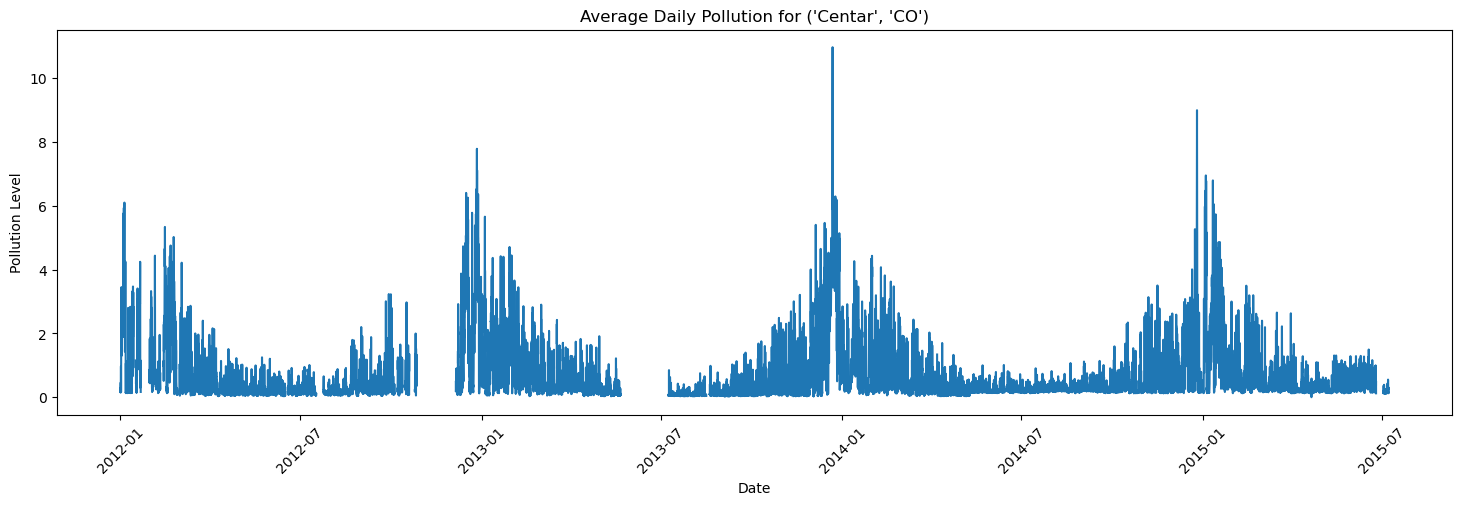

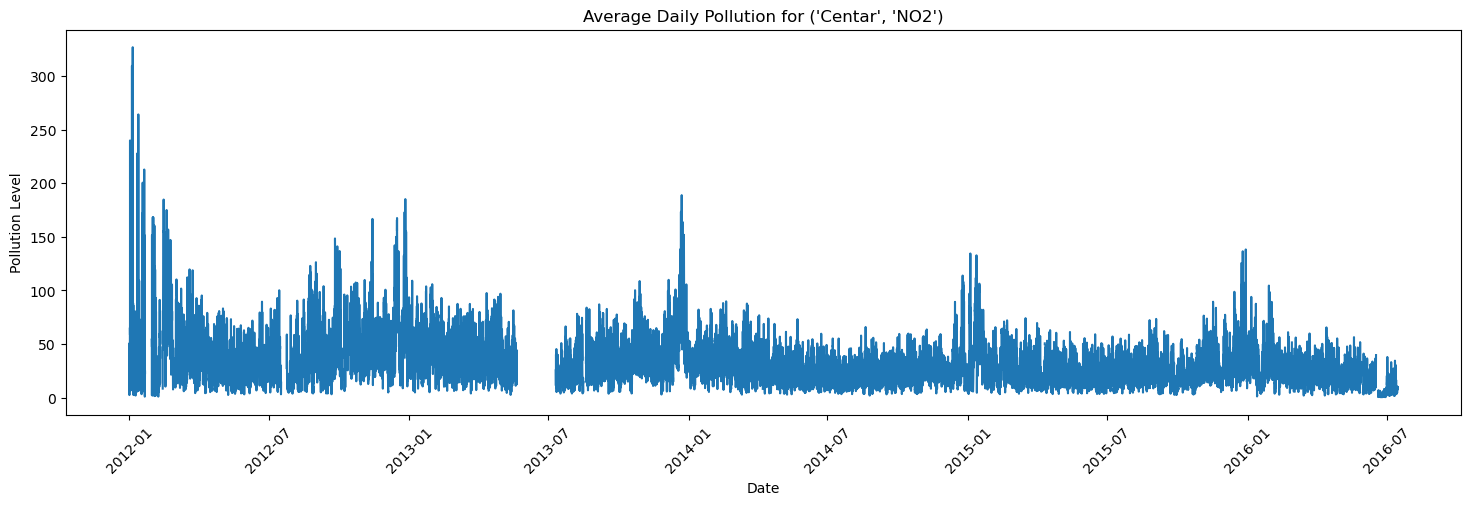

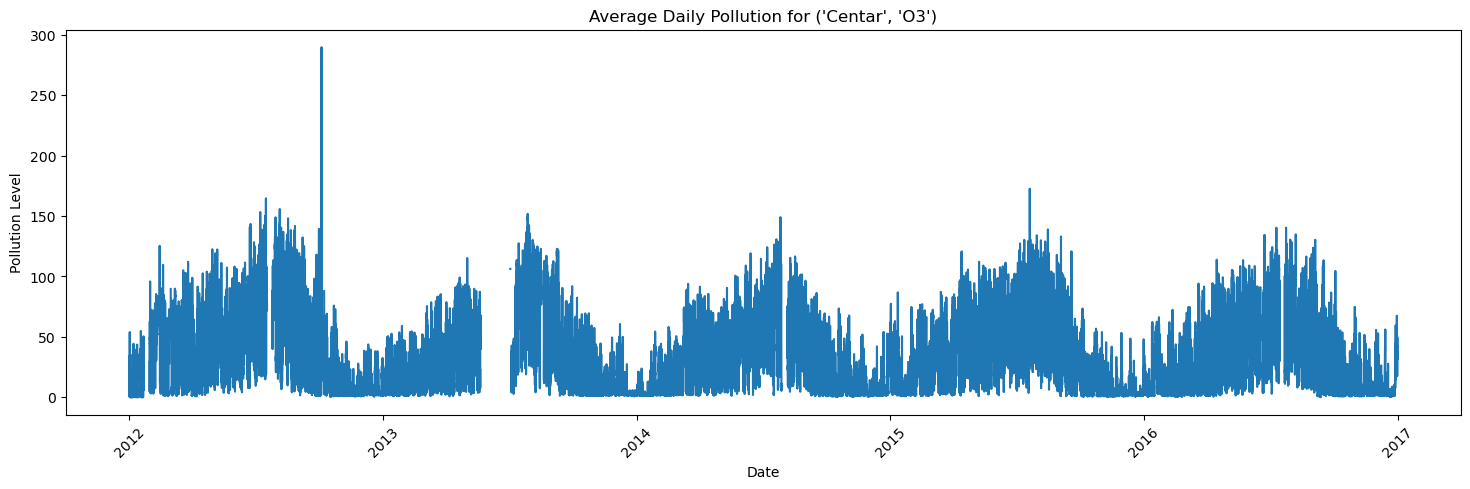

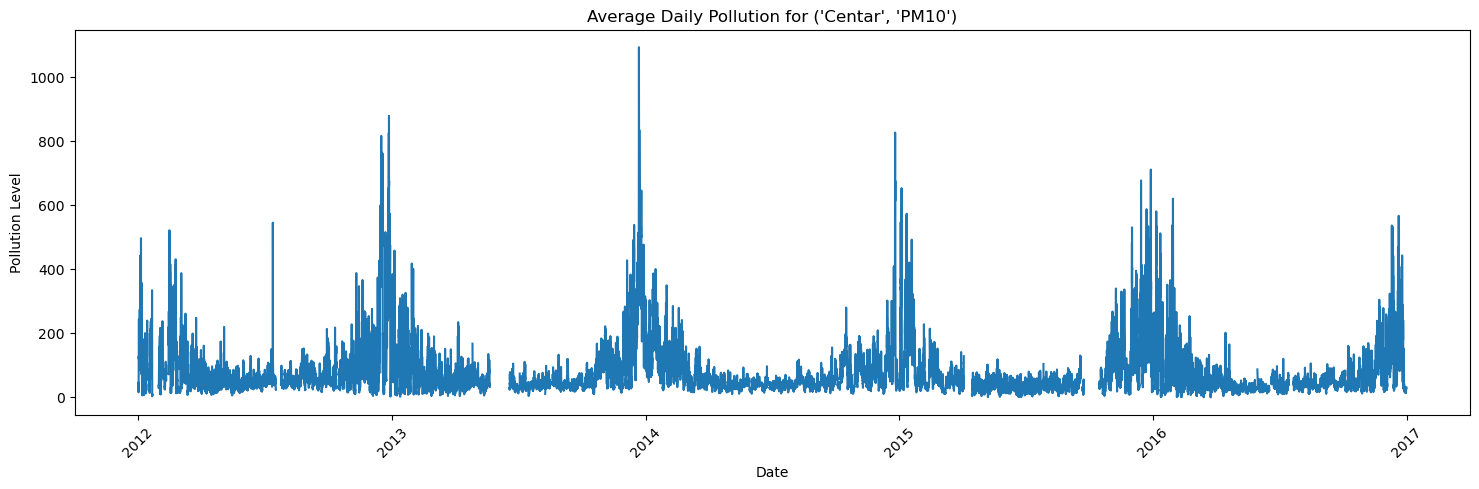

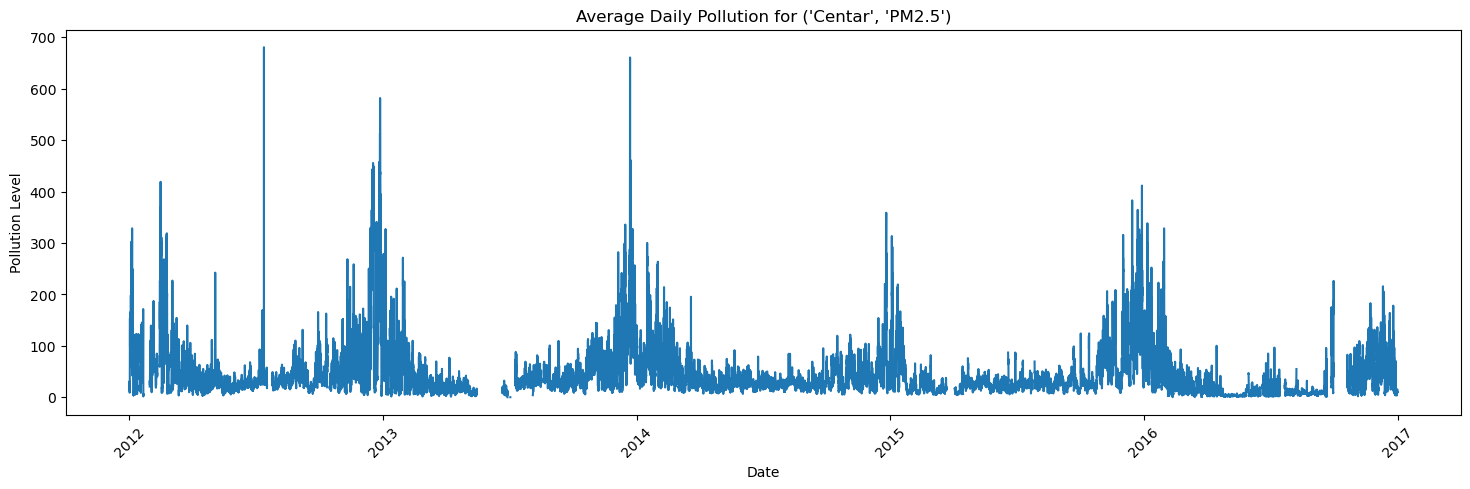

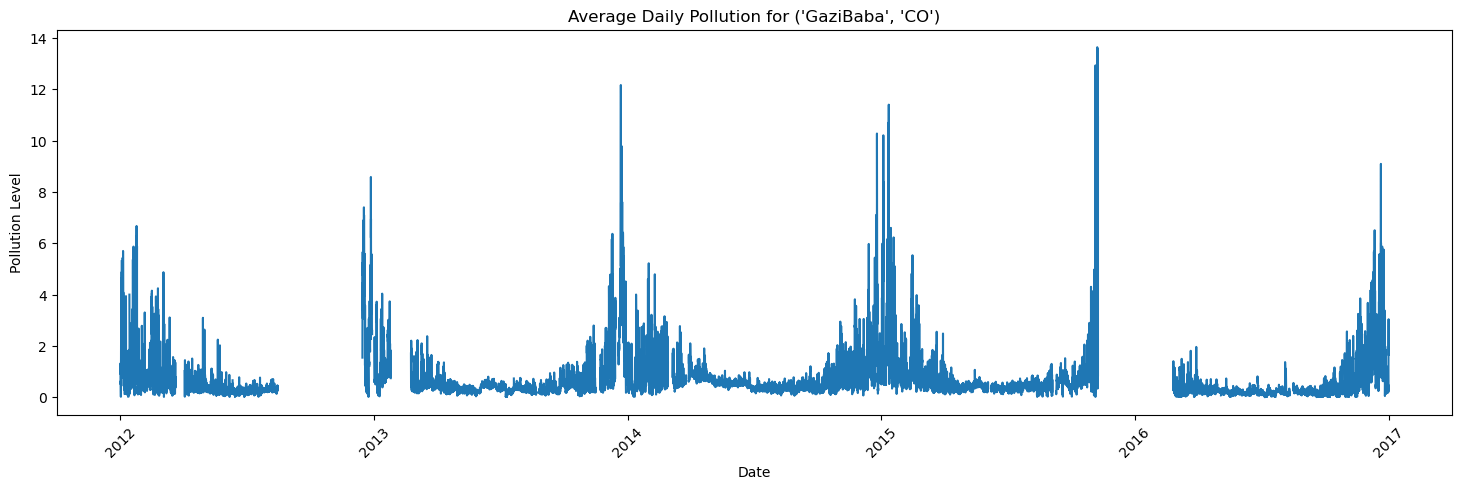

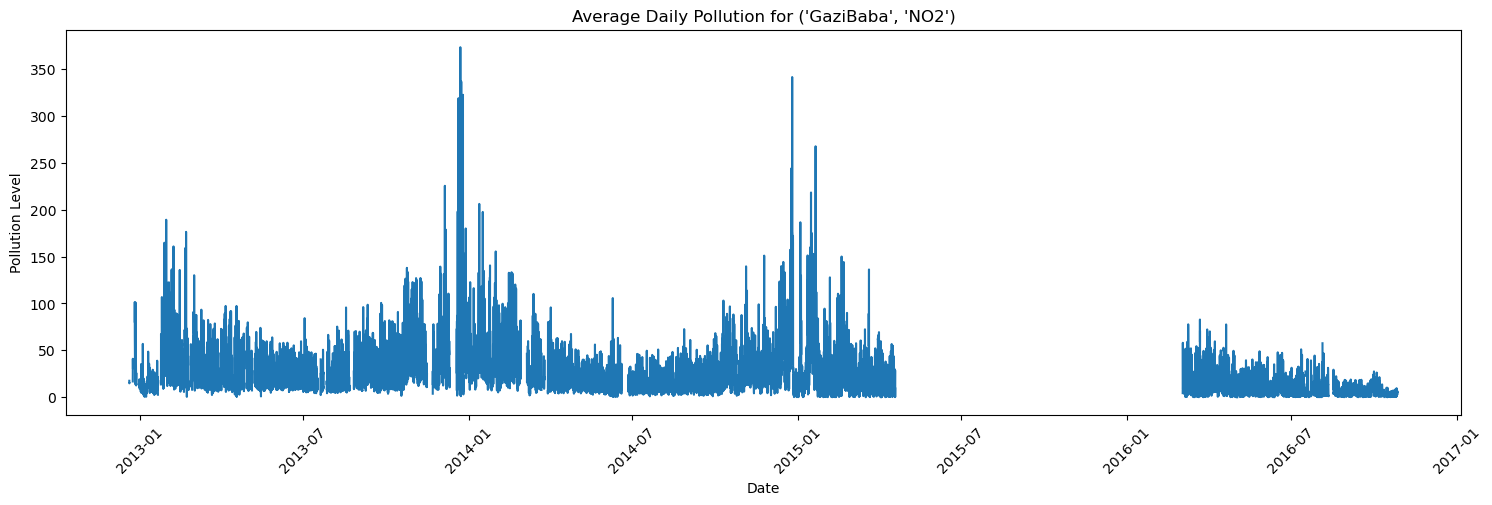

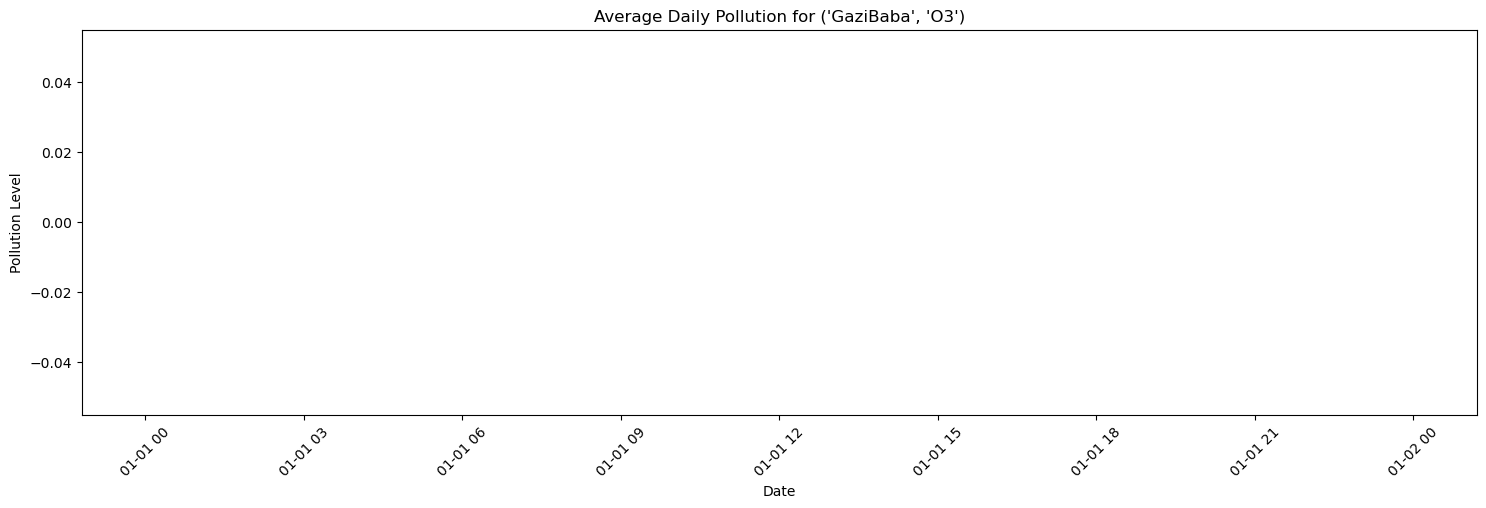

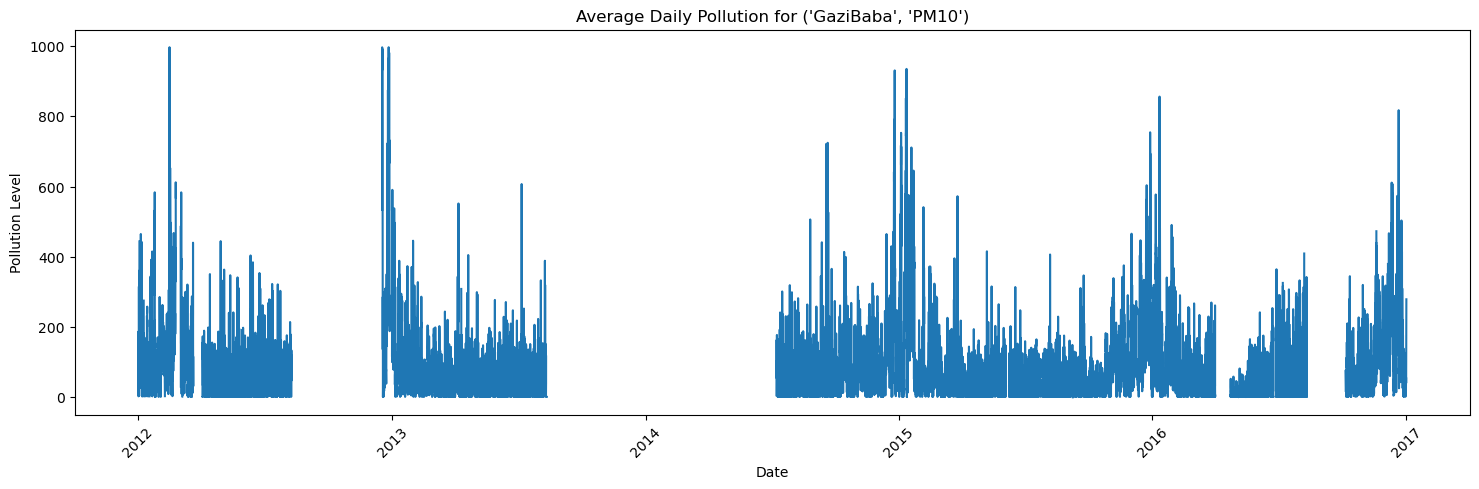

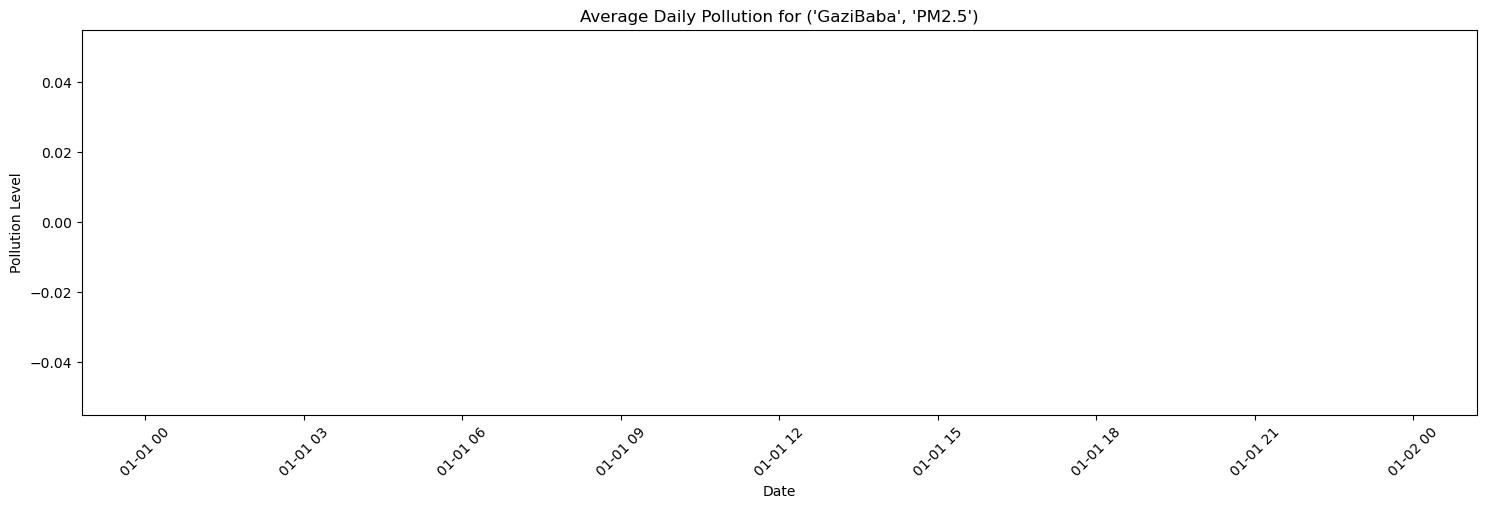

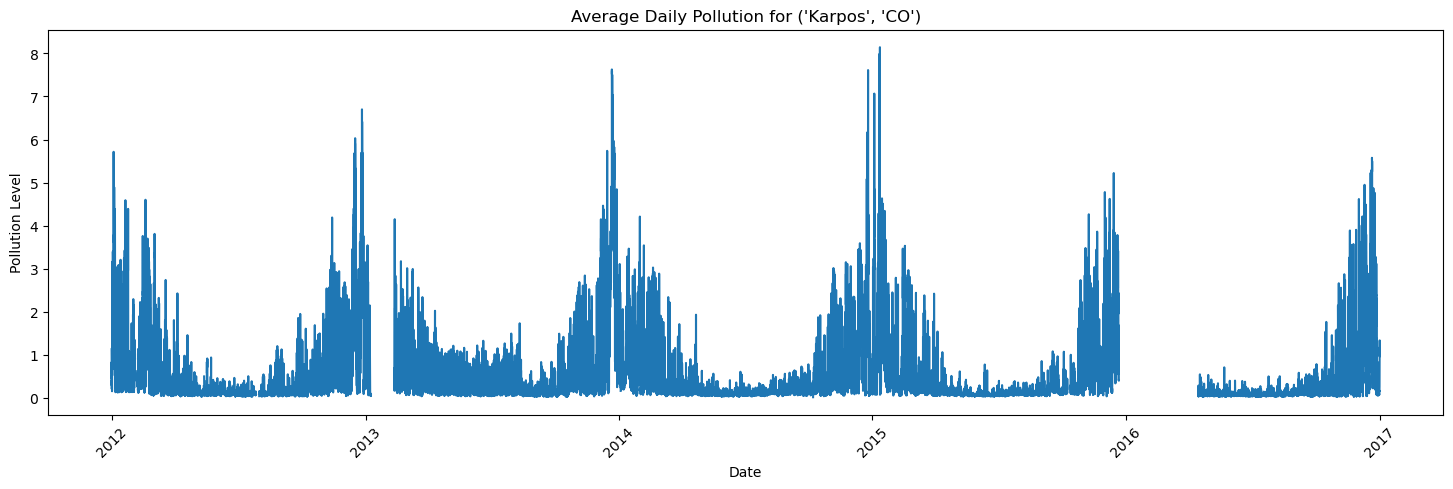

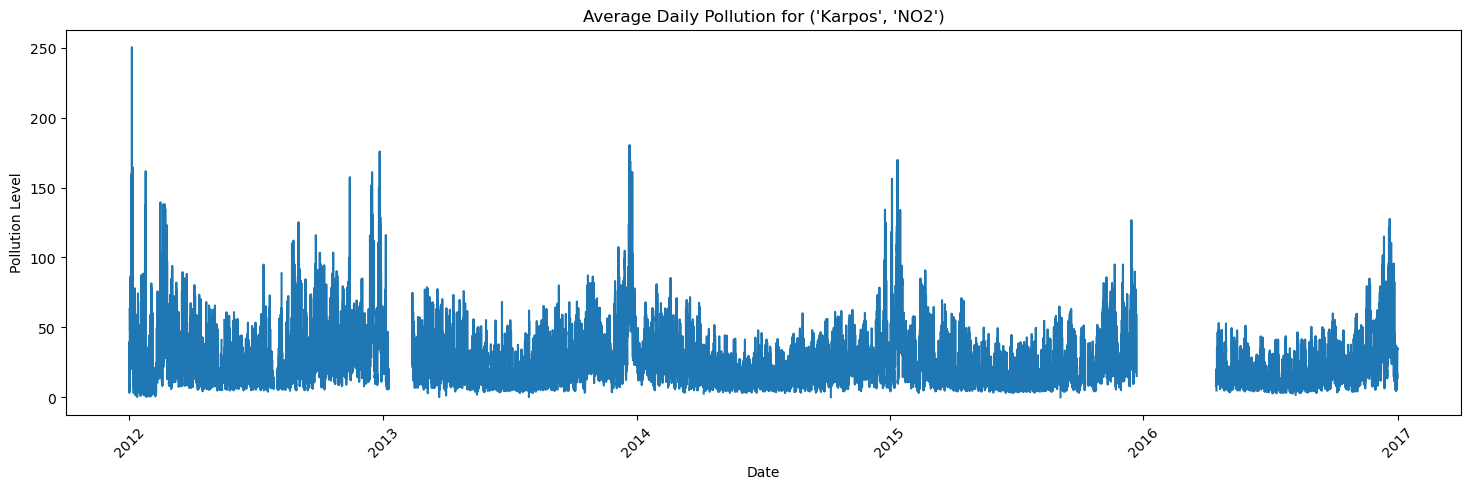

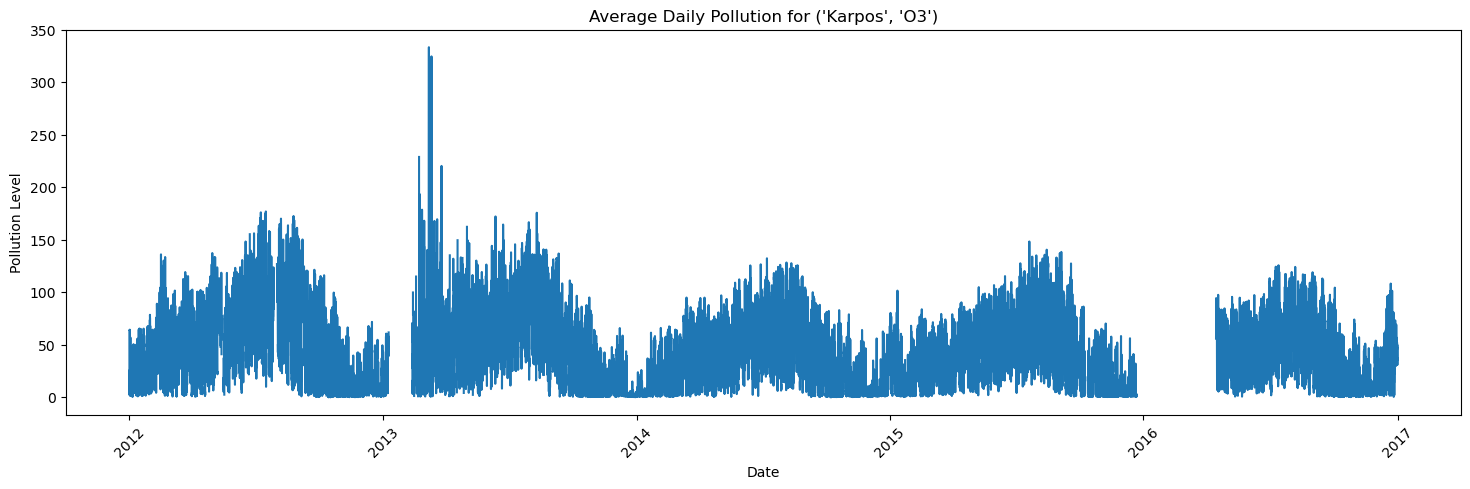

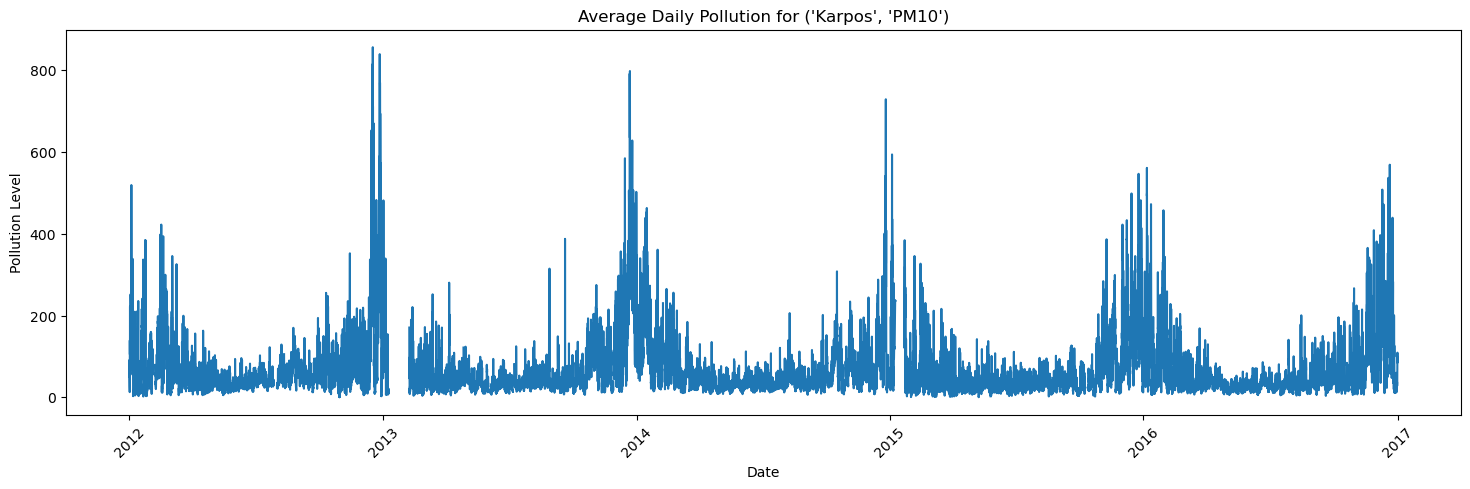

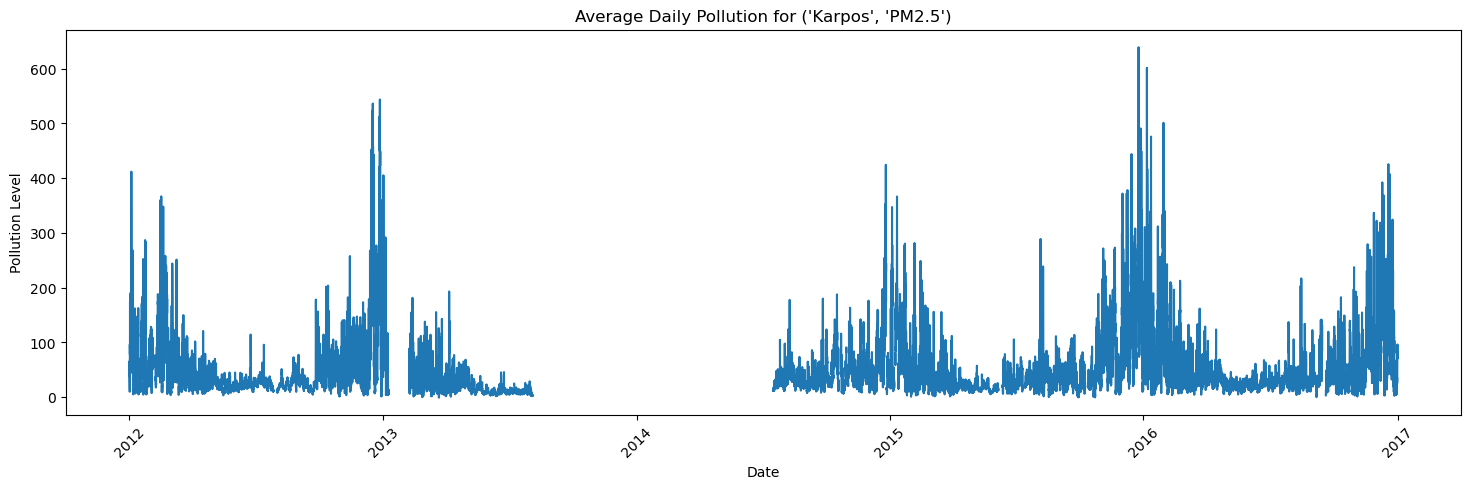

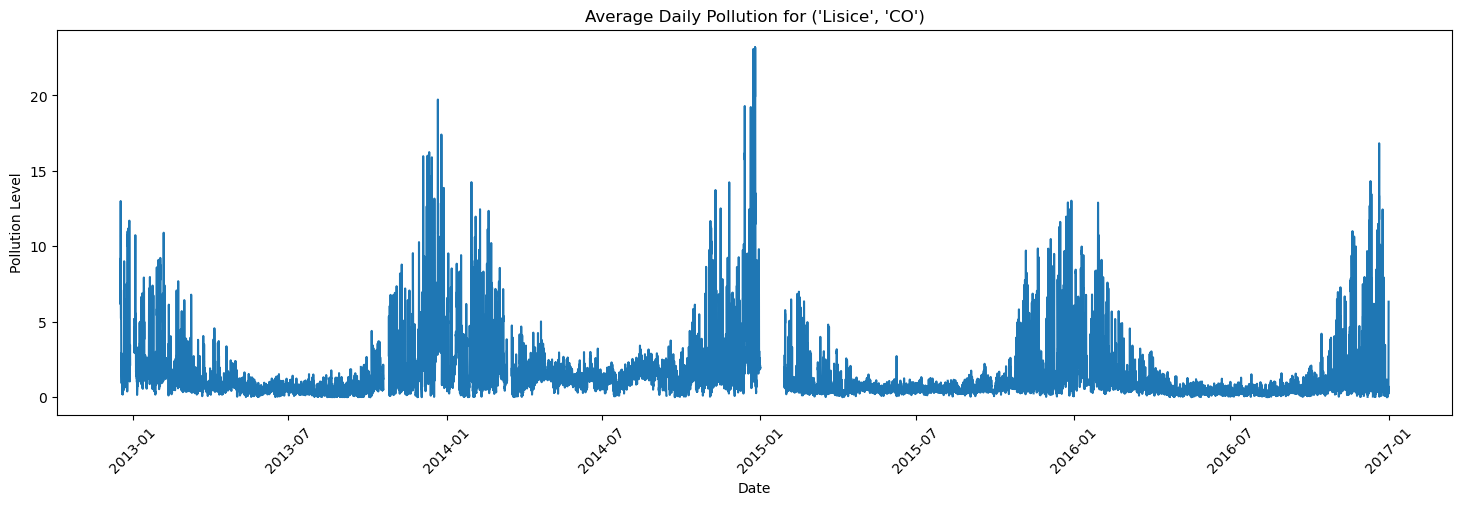

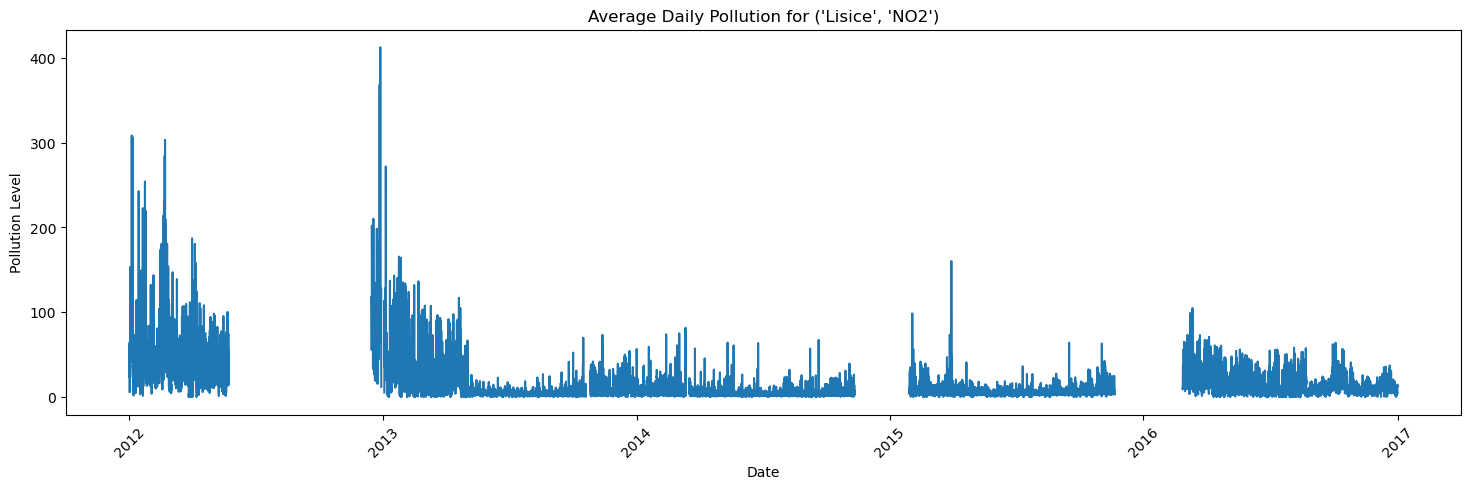

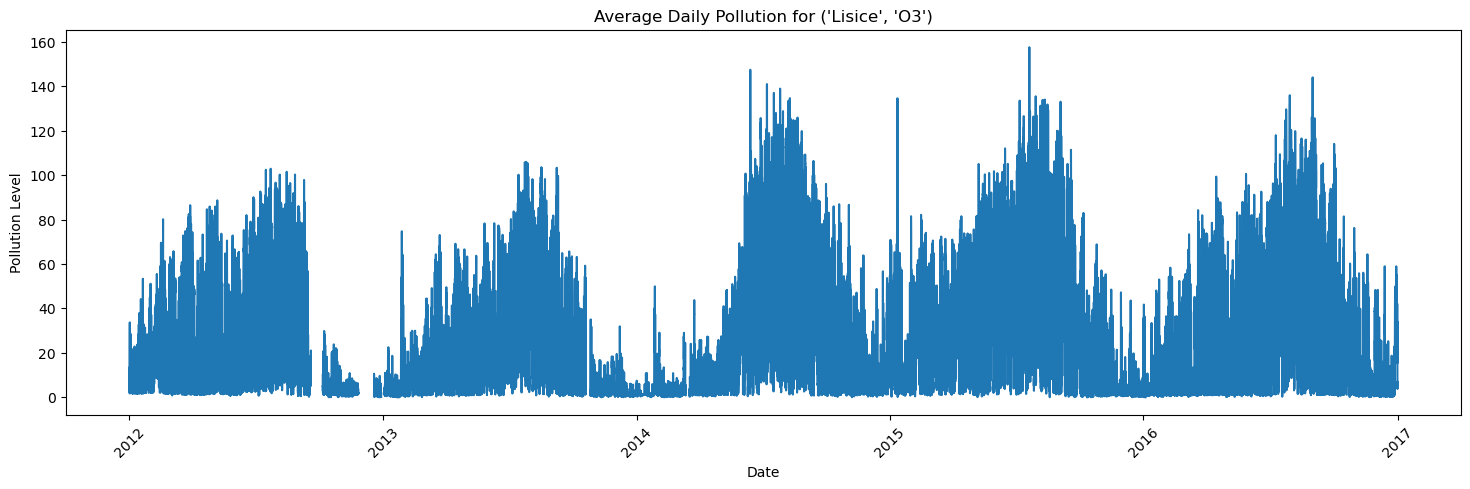

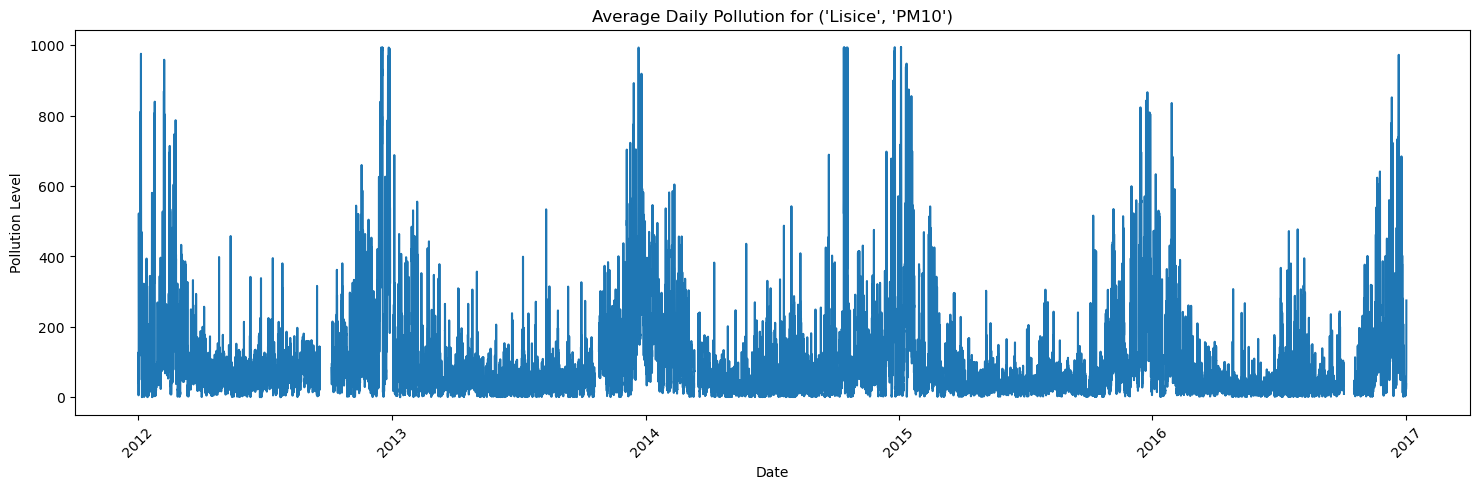

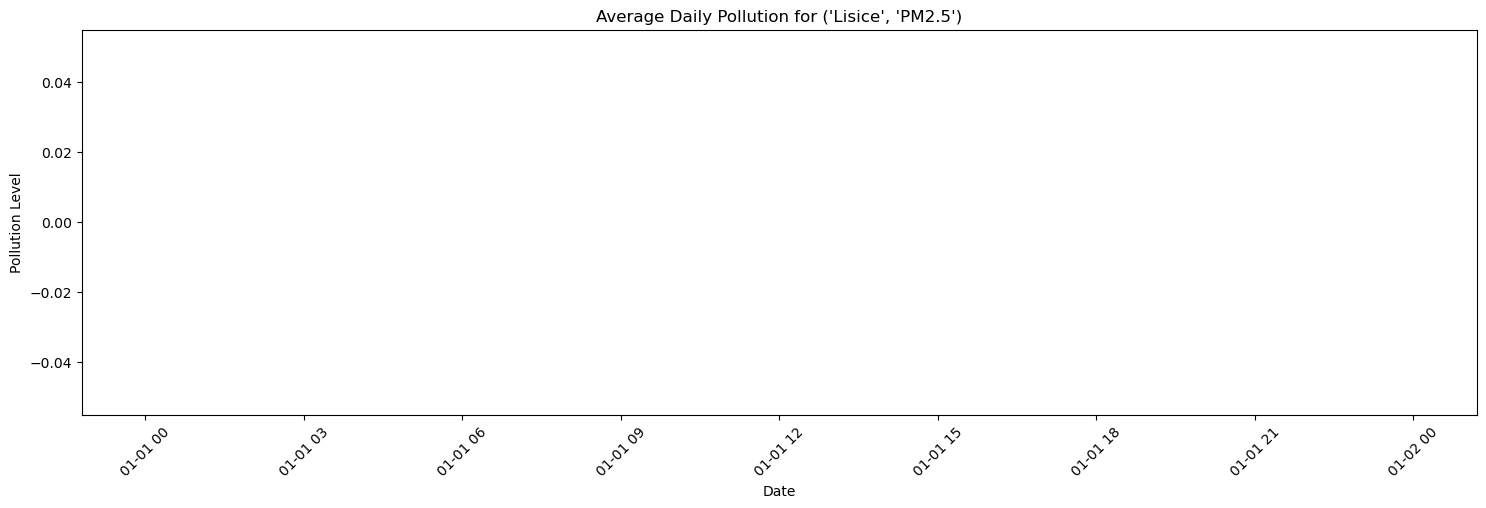

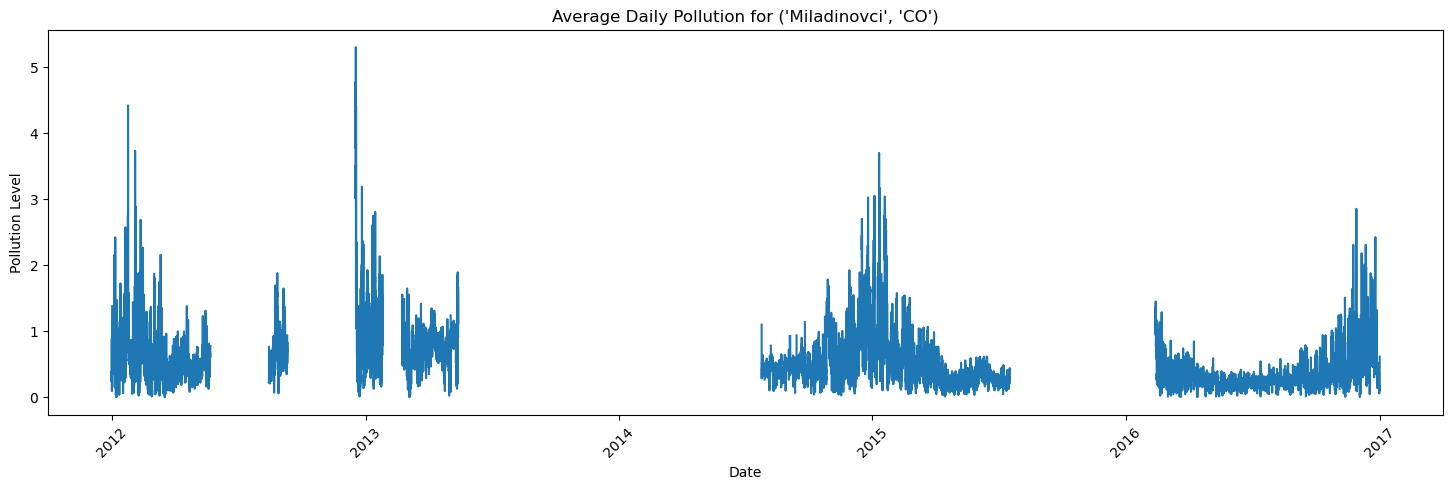

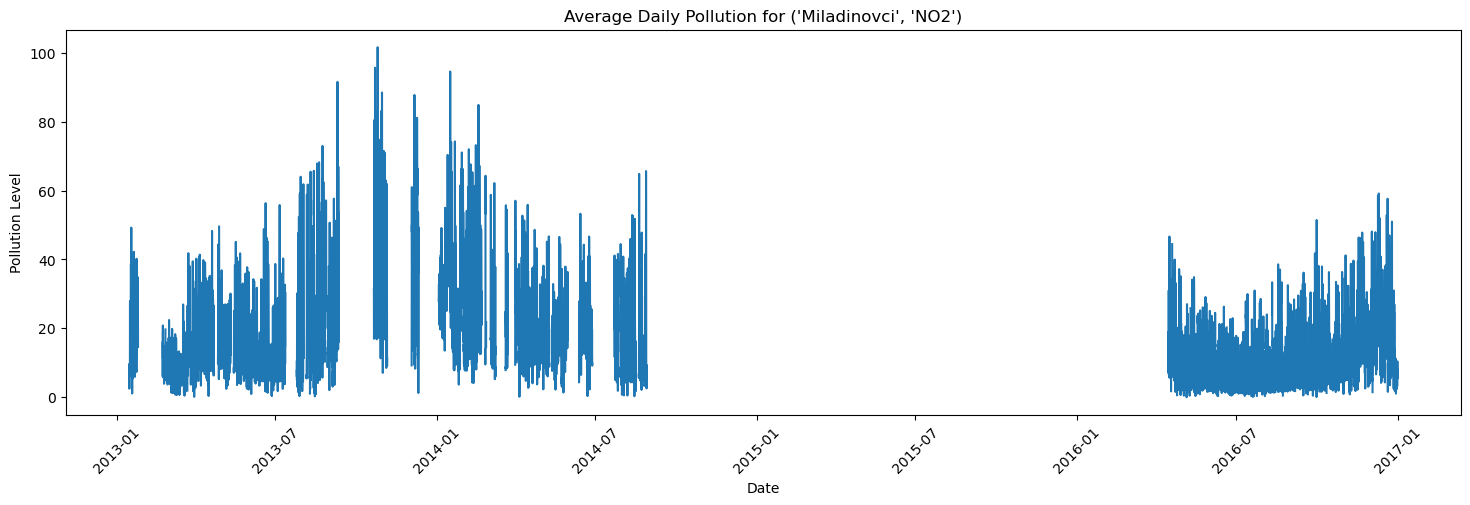

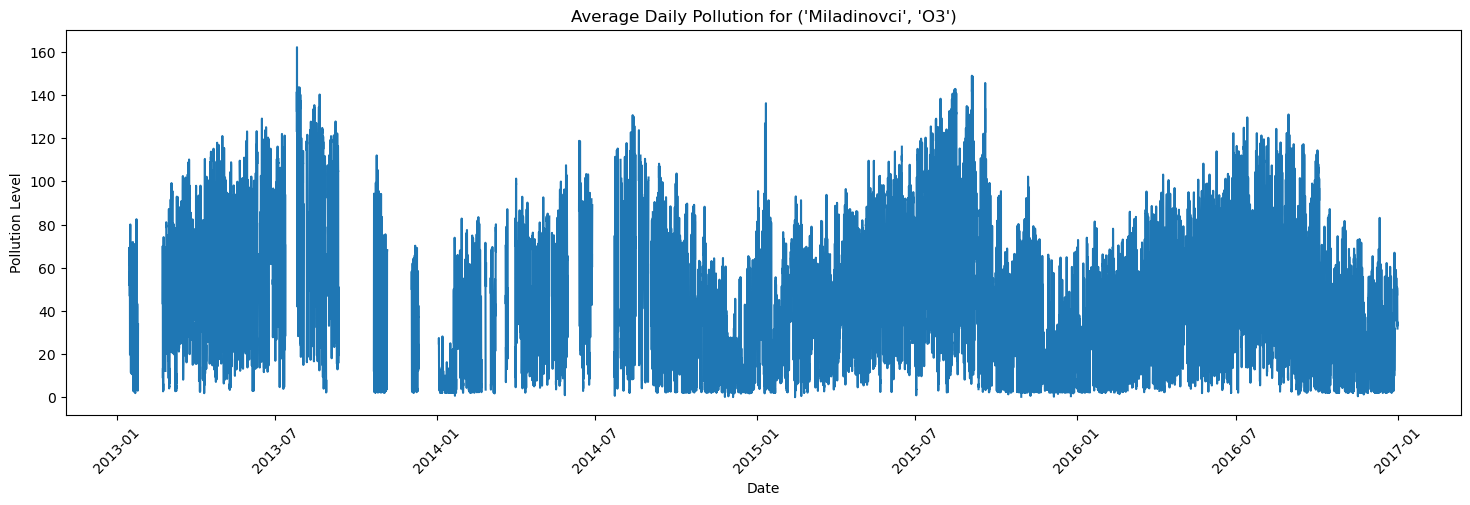

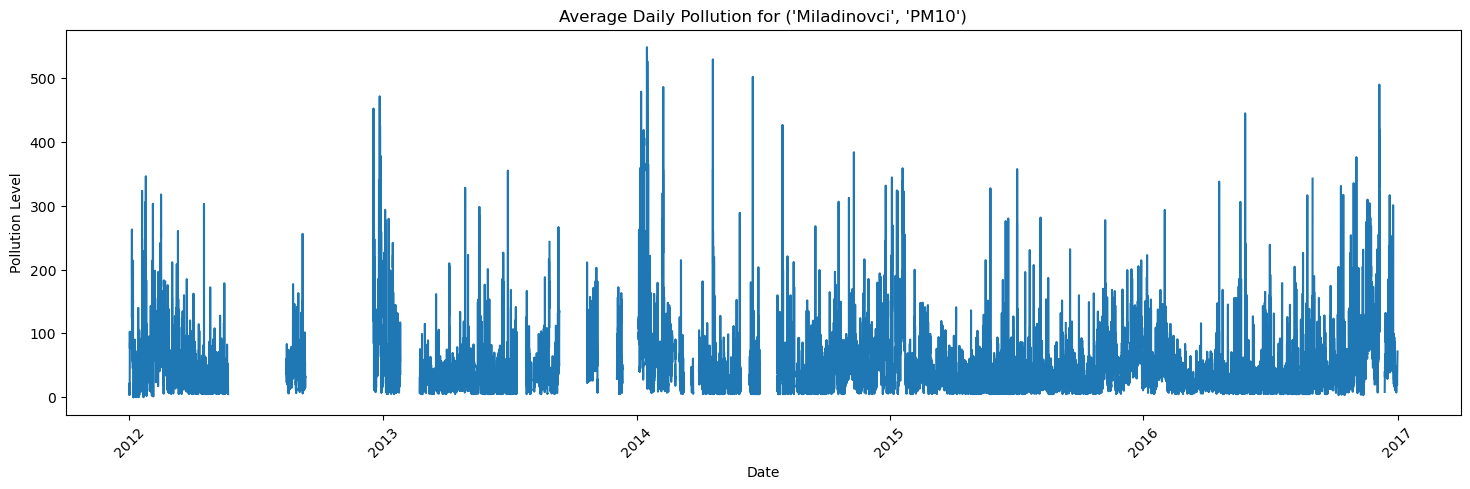

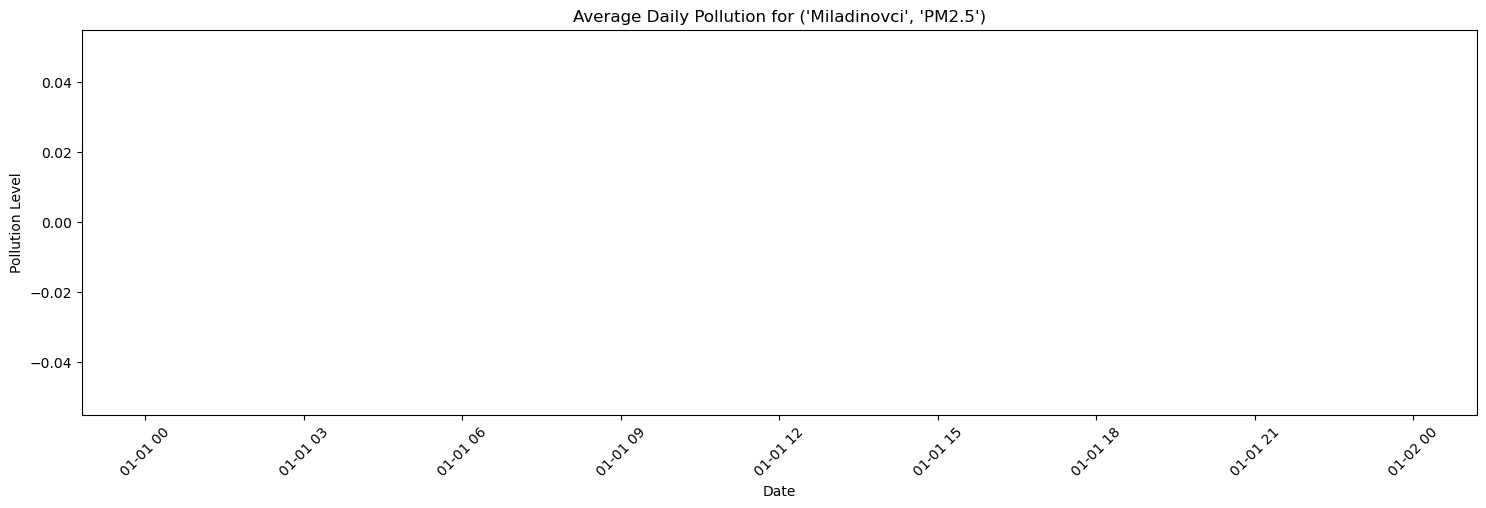

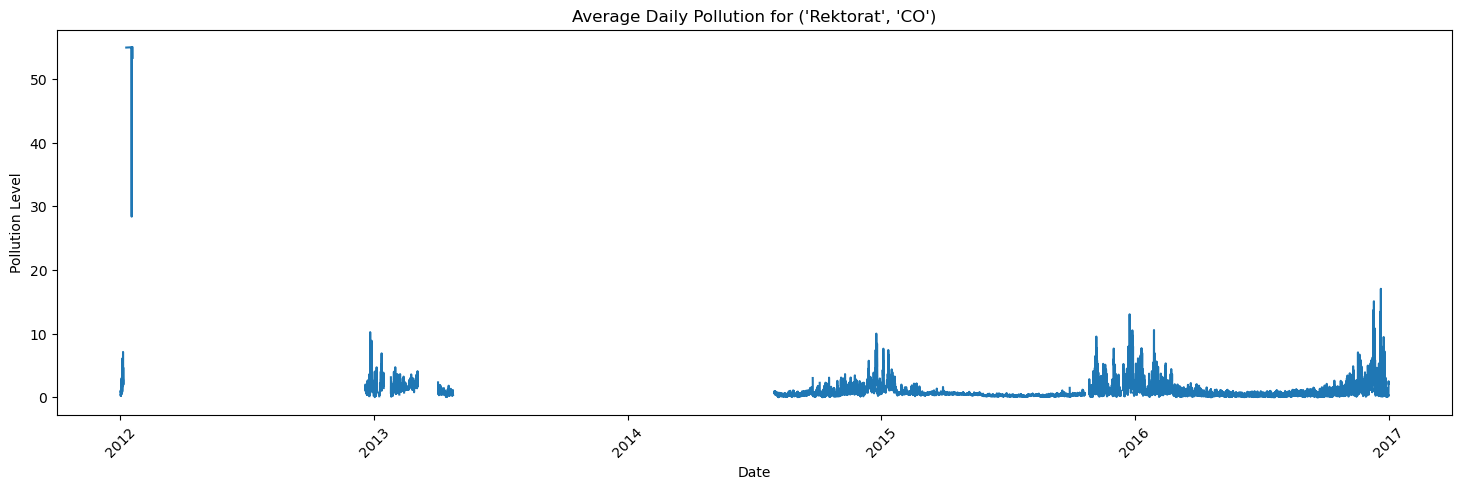

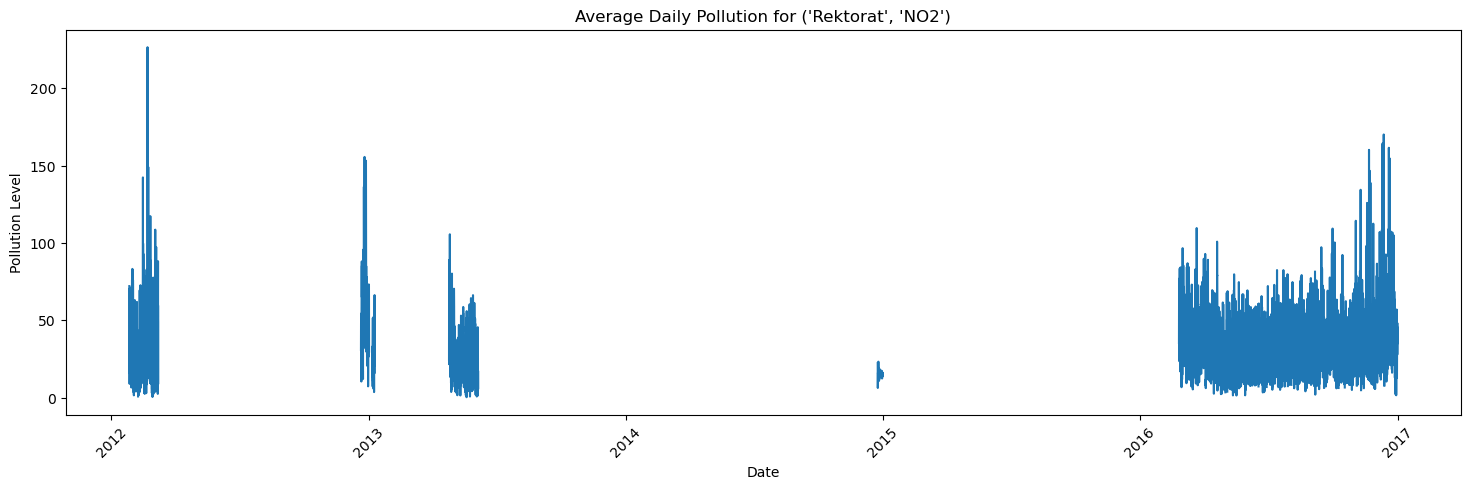

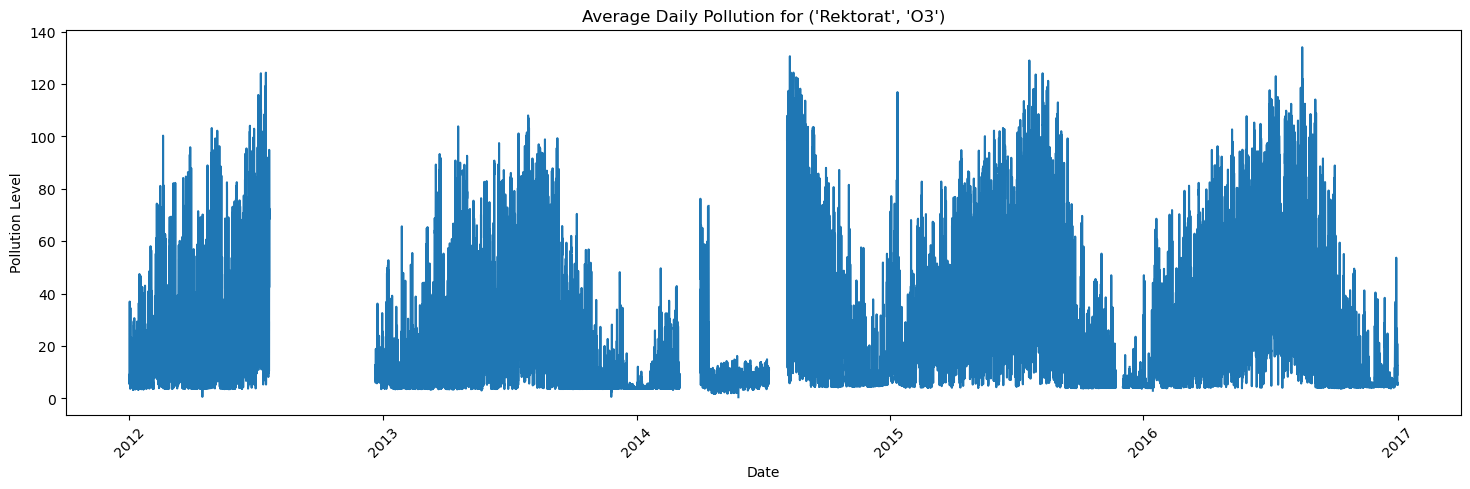

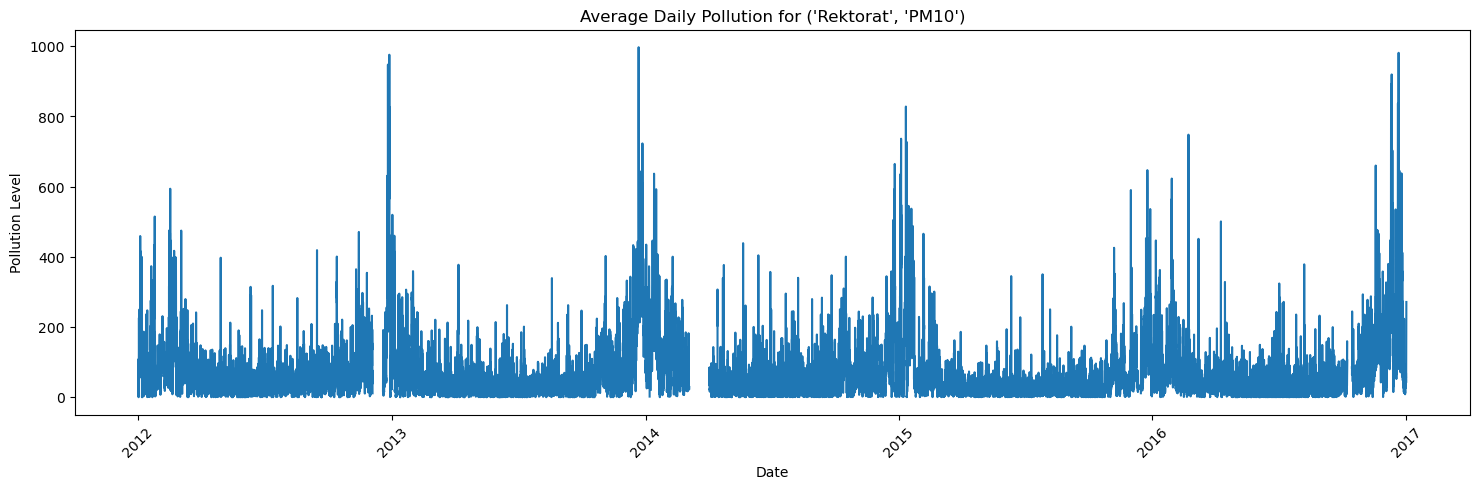

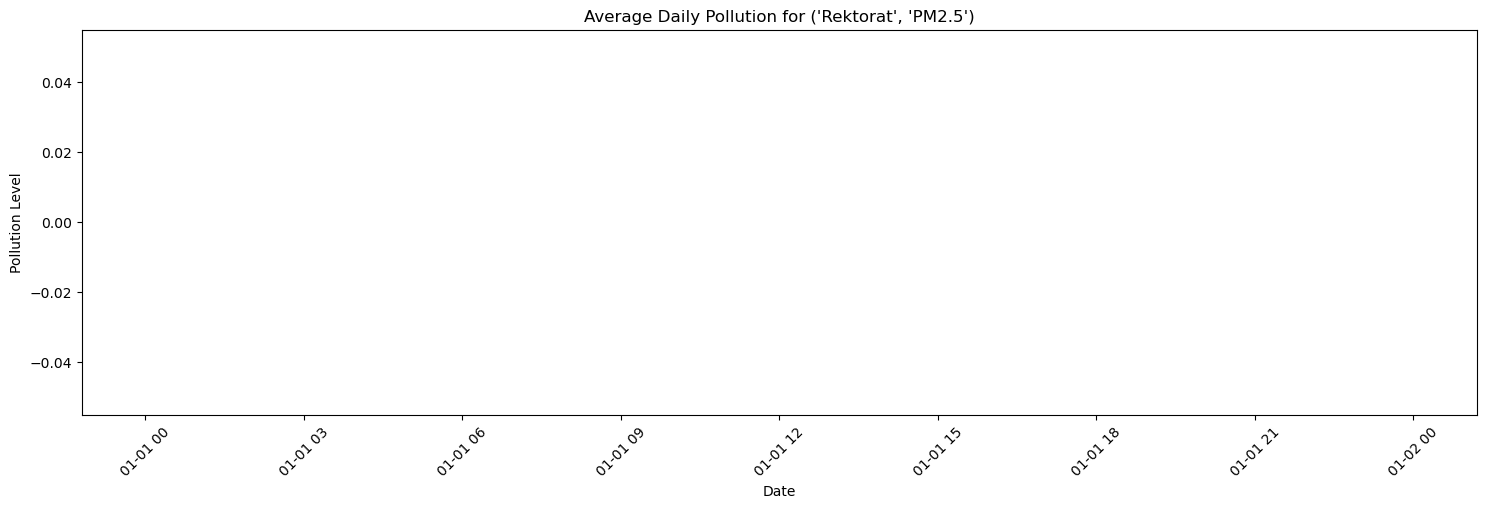

In [10]:
import matplotlib.pyplot as plt

# Calculate the average daily pollution across locations for each pollutant
avg_daily_pollution = combined_df.groupby(['datetime', 'pollutant'])[locations].mean().unstack()

# Plot the average daily pollution for each pollutant
pollutants = avg_daily_pollution.columns

for pollutant in pollutants:
    plt.figure(figsize = (18,5))
    plt.plot(avg_daily_pollution.index, avg_daily_pollution[pollutant])
    plt.title(f'Average Daily Pollution for {pollutant}')
    plt.xlabel('Date')
    plt.ylabel('Pollution Level')
    plt.xticks(rotation=45)
    plt.show()


## Questions 6
If the range of values for PM10 considered safe and unsafe is according to the following scale:

Good                                    0-50

Moderate 	                            51-154

Unhealthy for sensitive individuals 	155-254

Unhealthy 	                            255-354

Very unhealthy                          355-424

Hazardous                               425-504

On how many days in each year, was the average value of PM10 meauserd accross locations worse than moderate?  .......... (3 points)

In [11]:
# Filter the data for PM10 pollutant
pm10_data = combined_df[combined_df['pollutant'] == 'PM10']

# Calculate the average PM10 value across locations for each day
avg_pm10_daily = pm10_data.groupby(['datetime', 'year'])[locations].mean()

# Count the number of days in each year when the average PM10 value was worse than moderate (PM10 > 154)
worse_than_moderate_days = avg_pm10_daily[avg_pm10_daily > 154].groupby('year').count()

# Display the number of days in each year when the average PM10 value was worse than moderate
print("Number of Days in Each Year with PM10 Worse Than Moderate:")
print(worse_than_moderate_days)


Number of Days in Each Year with PM10 Worse Than Moderate:
      Centar  GaziBaba  Karpos  Lisice  Miladinovci  Rektorat
year                                                         
2012     819       771     710    1526          232       787
2013     841       430     663    1251          123       869
2014     597       554     603    1325          285       824
2015     954      1075     634    1357          221       706
2016     739      1124     748    1173          270       941


## Question 7
On how many days in each year, was the value of PM10 measured on at least one location worse than moderate? .......... (3 points)

In [12]:
# Filter the data for PM10 pollutant
pm10_data = combined_df[combined_df['pollutant'] == 'PM10']

# Find the days in each year when PM10 was worse than moderate on Centar
worse_than_moderate_days = pm10_data[pm10_data['Centar'] > 154].groupby(['year', 'datetime']).size().groupby('year').count()

# Number of days in each year when PM10 was worse than moderate in Centar
print("Number of days in each year with PM10 worse than moderate on Centar:")
print(worse_than_moderate_days)

Number of days in each year with PM10 worse than moderate on Centar:
year
2012    819
2013    841
2014    597
2015    954
2016    739
dtype: int64


In [13]:
# Number of the days in each year when PM10 was worse than moderate in GaziBaba
worse_than_moderate_days = pm10_data[pm10_data['GaziBaba'] > 154].groupby(['year', 'datetime']).size().groupby('year').count()

print("Number of the days in each year with PM10 worse than moderate in GaziBaba:")
print(worse_than_moderate_days)

Number of the days in each year with PM10 worse than moderate in GaziBaba:
year
2012     771
2013     430
2014     554
2015    1075
2016    1124
dtype: int64


In [14]:
# Number of the days in each year when PM10 was worse than moderate in Lisice
worse_than_moderate_days = pm10_data[pm10_data['Lisice'] > 154].groupby(['year', 'datetime']).size().groupby('year').count()

print("Number of the days in each year with PM10 worse than moderate in Lisice:")
print(worse_than_moderate_days)

Number of the days in each year with PM10 worse than moderate in Lisice:
year
2012    1526
2013    1251
2014    1325
2015    1357
2016    1173
dtype: int64


In [15]:
# Number of the days in each year when PM10 was worse than moderate in Karpos
worse_than_moderate_days = pm10_data[pm10_data['Karpos'] > 154].groupby(['year', 'datetime']).size().groupby('year').count()

print("Number of the days in each year with PM10 worse than moderate in Karpos:")
print(worse_than_moderate_days)

Number of the days in each year with PM10 worse than moderate in Karpos:
year
2012    710
2013    663
2014    603
2015    634
2016    748
dtype: int64


In [16]:
# Number of the days in each year when PM10 was worse than moderate in Miladinovci
worse_than_moderate_days = pm10_data[pm10_data['Miladinovci'] > 154].groupby(['year', 'datetime']).size().groupby('year').count()

print("Number of the days in each year with PM10 worse than moderate in Miladinovci:")
print(worse_than_moderate_days)

Number of the days in each year with PM10 worse than moderate in Miladinovci:
year
2012    232
2013    123
2014    285
2015    221
2016    270
dtype: int64


In [17]:
# Number of the days in each year when PM10 was worse than moderate in Rektorat
worse_than_moderate_days = pm10_data[pm10_data['Rektorat'] > 154].groupby(['year', 'datetime']).size().groupby('year').count()

print("Number of the days in each year with PM10 worse than moderate in Rektorat:")
print(worse_than_moderate_days)

Number of the days in each year with PM10 worse than moderate in Rektorat:
year
2012    787
2013    869
2014    824
2015    706
2016    941
dtype: int64


## Question 8
Make a bar plot showing the average number of days per year when the measured value for PM10 was worse than moderate on at least one location.  .......... (3 points)

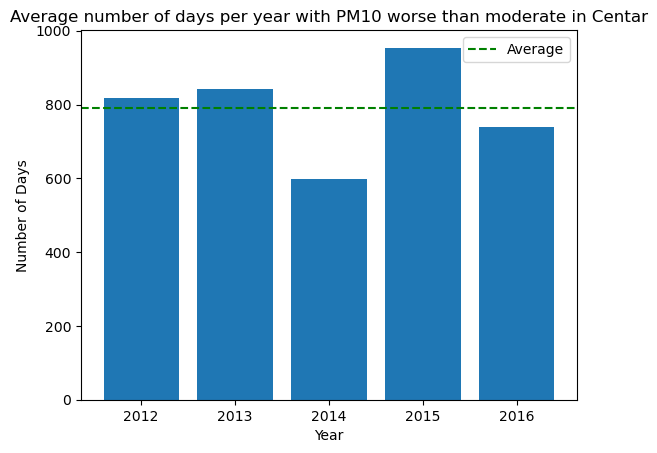

In [33]:
import matplotlib.pyplot as plt

# Filter the data for PM10 pollutant
pm10_data = combined_df[combined_df['pollutant'] == 'PM10']

# Find the days in each year when PM10 was worse than moderate in Centar
worse_than_moderate_days = pm10_data[pm10_data['Centar'] > 154].groupby(['year', 'datetime']).size().groupby('year').count()

# Calculate the average number of days per year when PM10 was worse than moderate in Centar
average_worse_than_moderate_days = worse_than_moderate_days.mean()

# Create a bar plot of the average number of days per year with PM10 worse than moderate in Centar
plt.bar(worse_than_moderate_days.index, worse_than_moderate_days)
plt.axhline(average_worse_than_moderate_days, color='green', linestyle='--', label='Average')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.title('Average number of days per year with PM10 worse than moderate in Centar')
plt.legend()
plt.show()

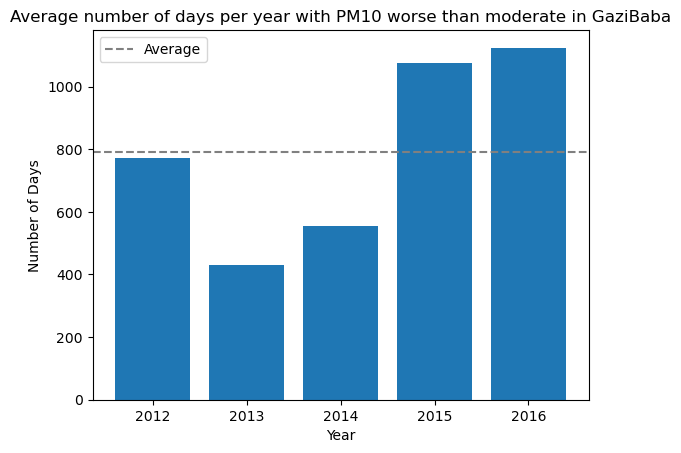

In [19]:
import matplotlib.pyplot as plt

# Filter the data for PM10 pollutant
pm10_data = combined_df[combined_df['pollutant'] == 'PM10']

# Find the days in each year when PM10 was worse than moderate in GaziBaba
worse_than_moderate_days = pm10_data[pm10_data['GaziBaba'] > 154].groupby(['year', 'datetime']).size().groupby('year').count()

# Calculate the average number of days per year when PM10 was worse than moderate in GaziBaba
average_worse_than_moderate_days = worse_than_moderate_days.mean()

# Create a bar plot of the average number of days per year with PM10 worse than moderate in GaziBaba
plt.bar(worse_than_moderate_days.index, worse_than_moderate_days)
plt.axhline(average_worse_than_moderate_days, color='grey', linestyle='--', label='Average')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.title('Average number of days per year with PM10 worse than moderate in GaziBaba')
plt.legend()
plt.show()

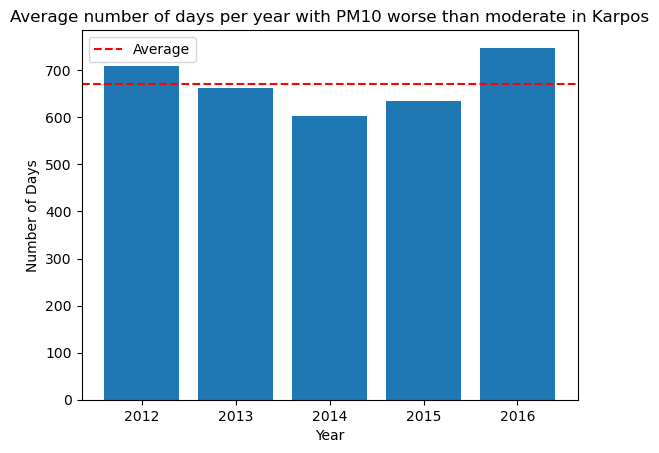

In [32]:
import matplotlib.pyplot as plt

# Filter the data for PM10 pollutant
pm10_data = combined_df[combined_df['pollutant'] == 'PM10']

# Find the days in each year when PM10 was worse than moderate in Karpos
worse_than_moderate_days = pm10_data[pm10_data['Karpos'] > 154].groupby(['year', 'datetime']).size().groupby('year').count()

# Calculate the average number of days per year when PM10 was worse than moderate in Karpos
average_worse_than_moderate_days = worse_than_moderate_days.mean()

# Create a bar plot of the average number of days per year with PM10 worse than moderate in Karpos
plt.bar(worse_than_moderate_days.index, worse_than_moderate_days)
plt.axhline(average_worse_than_moderate_days, color='red', linestyle='--', label='Average')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.title('Average number of days per year with PM10 worse than moderate in Karpos')
plt.legend()
plt.show()

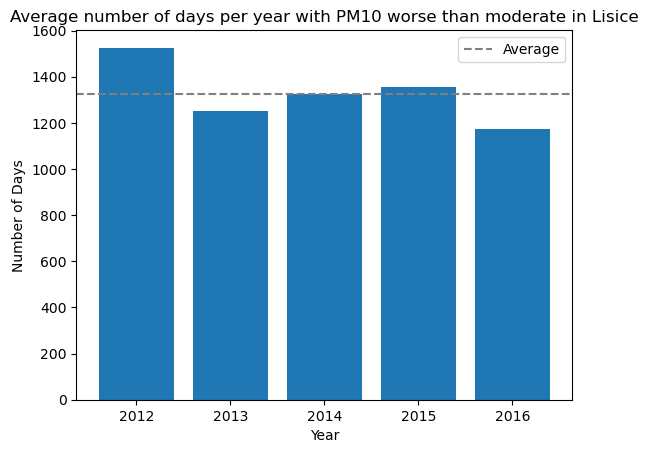

In [21]:
import matplotlib.pyplot as plt

# Filter the data for PM10 pollutant
pm10_data = combined_df[combined_df['pollutant'] == 'PM10']

# Find the days in each year when PM10 was worse than moderate in Lisice
worse_than_moderate_days = pm10_data[pm10_data['Lisice'] > 154].groupby(['year', 'datetime']).size().groupby('year').count()

# Calculate the average number of days per year when PM10 was worse than moderate in Lisice
average_worse_than_moderate_days = worse_than_moderate_days.mean()

# Create a bar plot of the average number of days per year with PM10 worse than moderate in Lisice
plt.bar(worse_than_moderate_days.index, worse_than_moderate_days)
plt.axhline(average_worse_than_moderate_days, color='grey', linestyle='--', label='Average')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.title('Average number of days per year with PM10 worse than moderate in Lisice')
plt.legend()
plt.show()

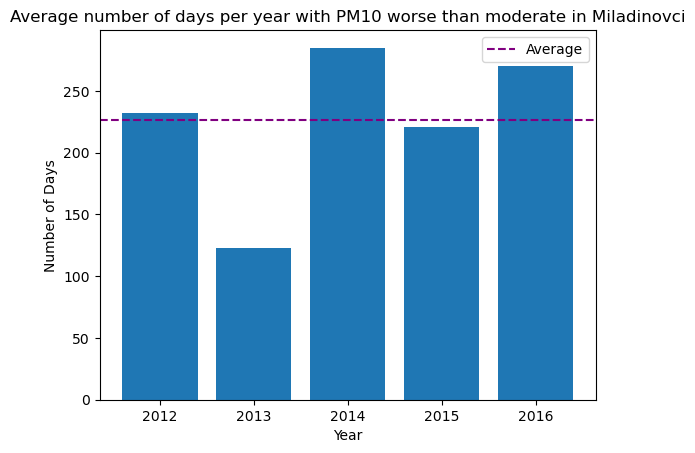

In [22]:
import matplotlib.pyplot as plt

# Filter the data for PM10 pollutant
pm10_data = combined_df[combined_df['pollutant'] == 'PM10']

# Find the days in each year when PM10 was worse than moderate in Miladinovci
worse_than_moderate_days = pm10_data[pm10_data['Miladinovci'] > 154].groupby(['year', 'datetime']).size().groupby('year').count()

# Calculate the average number of days per year when PM10 was worse than moderate in Miladinovci
average_worse_than_moderate_days = worse_than_moderate_days.mean()

# Create a bar plot of the average number of days per year with PM10 worse than moderate in Miladinovci
plt.bar(worse_than_moderate_days.index, worse_than_moderate_days)
plt.axhline(average_worse_than_moderate_days, color='purple', linestyle='--', label='Average')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.title('Average number of days per year with PM10 worse than moderate in Miladinovci')
plt.legend()
plt.show()

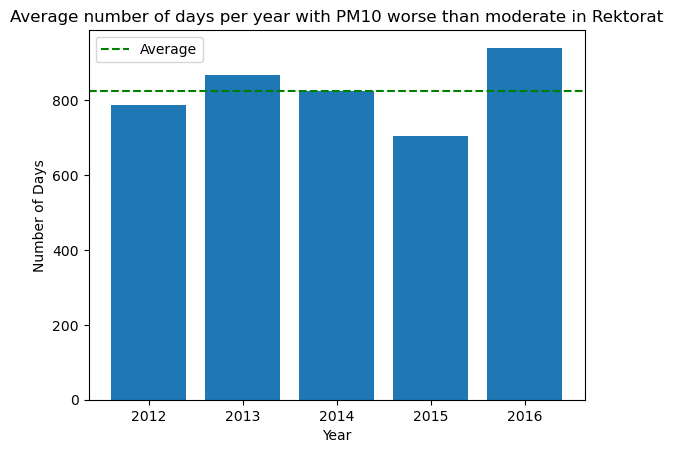

In [24]:
import matplotlib.pyplot as plt

# Filter the data for PM10 pollutant
pm10_data = combined_df[combined_df['pollutant'] == 'PM10']

# Find the days in each year when PM10 was worse than moderate in Rektorat
worse_than_moderate_days = pm10_data[pm10_data['Rektorat'] > 154].groupby(['year', 'datetime']).size().groupby('year').count()

# Calculate the average number of days per year when PM10 was worse than moderate in Rektorat
average_worse_than_moderate_days = worse_than_moderate_days.mean()

# Create a bar plot of the average number of days per year with PM10 worse than moderate in Rektorat
plt.bar(worse_than_moderate_days.index, worse_than_moderate_days)
plt.axhline(average_worse_than_moderate_days, color='green', linestyle='--', label='Average')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.title('Average number of days per year with PM10 worse than moderate in Rektorat')
plt.legend()
plt.show()